In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma

# 📝 과제 : 연속형 데이터의 평균 추정
MLE와 MAP 2가지 방법으로 평균을 추정하고 그 결과 비교하기


In [55]:
# 데이터 준비
np.random.seed(42)
true_mean = 30  # 실제 평균
true_std = 5   # 실제 표준편차
n_samples = 500  # 데이터 개수

# 평균이 50이고 표준 편차가 10인 정규 분포에서 생성된 연속형 데이터
data = np.random.normal(loc=true_mean, scale=true_std, size=n_samples)

Data Summary:
Total samples: 500
Mean: 30.03
Standard deviation: 4.90


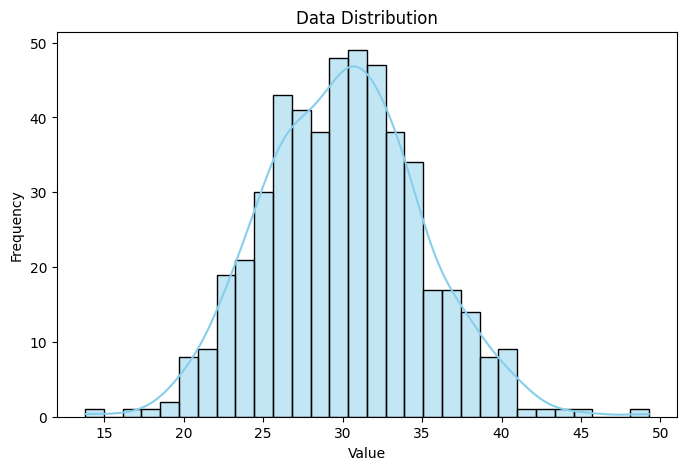

In [56]:
# 데이터 분포 확인
def eda(data):
    print("Data Summary:")
    print(f"Total samples: {len(data)}")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Standard deviation: {np.std(data):.2f}")

    # Data Visualization
    plt.figure(figsize=(8, 5))
    sns.histplot(data, kde=True, color="skyblue", bins=30)
    plt.title("Data Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

eda(data)

### MLE
### 1. 우도 계산  
우도 함수는 주어진 파라미터 𝜇 하에서 관측될 확률의 곱으로 정의.  
  
정규분포 𝑁(𝜇,𝜎^2)를 가정했을 때, 각 데이터 𝑥_𝑖의 PDF는  

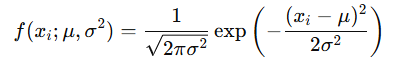
  
데이터의 독립성을 만족한다는 전제 하에 전체 데이터 𝑥_1,𝑥_2,…,𝑥_𝑛에 대한 우도 함수는  
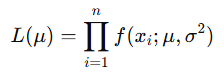
  
---  

### 2. 로그 우도 함수 미분
정규분포의 우도 함수에 로그를 취하면  
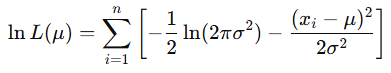
  
상수인 −(1/2)ln(2𝜋𝜎^2)는 𝜇에 영향을 주지 않으므로 생략하고, ln𝐿(𝜇)는 다음과 같이 단순화  
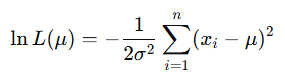  

μ에 대해 미분하면

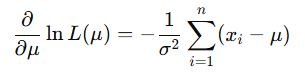  
  
---  
  
### 3. 미분식에서 μ계산
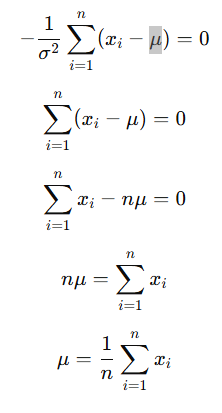

In [57]:
# MLE 함수
# 문제 1: 위의 정규분포 MLE 과정을 읽고 아래 빈칸을 채워주세요.
def mle_estimation(data):

    data_sum = np.sum(data)  # 데이터 합
    n_samples = len(data)    # 데이터 개수

    mle_mean = data_sum / n_samples

    return mle_mean

## MAP

### 1. 사전분포 정의
μ가 정규분포를 따른다고 가정

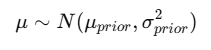  

---  
  
### 2. 우도 계산
주어진 데이터 𝑥_1,𝑥_2,…,𝑥_𝑛가 정규분포를 따르기 때문에 우도 함수는 아래와 같이 정의  

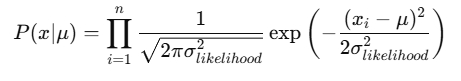  
  
---  
  
### 3, 사후 분포 계산
베이즈 정리에 따라 사후 확률은 다음과 같이 정의  

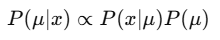  

사전 분포와 우도 함수가 모두 정규분포인 정규 사후 분포 역시 정규 분포가 됨  

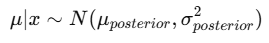  

이때 사후 평균의 정의는  

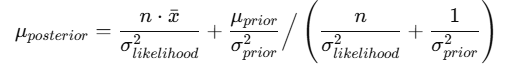  

여기서
- 𝑛: 데이터 개수
- xˉ: 데이터의 평균
- σ_likelihood^2: 우도의 분산
- σ_prior^2: 사전의 분산
- μ_prior: 사전 평균

In [64]:
# MAP 함수
# 문제 2: 위의 정규분포 MAP 과정을 읽고 아래 빈칸을 채워주세요.
def map_estimation(data, mu_prior, sigma_prior, sigma_likelihood):

    # 사전 확률의 평균과 분산
    prior_variance = sigma_prior**2
    # 우도 분산
    likelihood_variance = sigma_likelihood**2

    # 사후 확률 계산
    n_samples = len(data)        # 데이터 개수
    sample_mean = np.mean(data)  # 데이터 평균

    # 사후 확률의 평균 정의
    posterior_mean = (((n_samples * sample_mean) / likelihood_variance) + (mu_prior / prior_variance))\
          / ((n_samples / likelihood_variance) + (1 / prior_variance))

    return posterior_mean

# 사전확률 정의
mu_prior = 25  # 평균
sigma_prior = 2  # 표준편차

sigma_likelihood = true_std  # 우도 표준편차는 데이터의 표준편차

In [65]:
# 추정 결과
mle_result = mle_estimation(data)
map_result = map_estimation(data, mu_prior, sigma_prior, sigma_likelihood)

print("MLE Estimate for Mean:", mle_result)
print("MAP Estimate for Mean:", map_result)

MLE Estimate for Mean: 30.03418997294324
MAP Estimate for Mean: 29.97203947945011


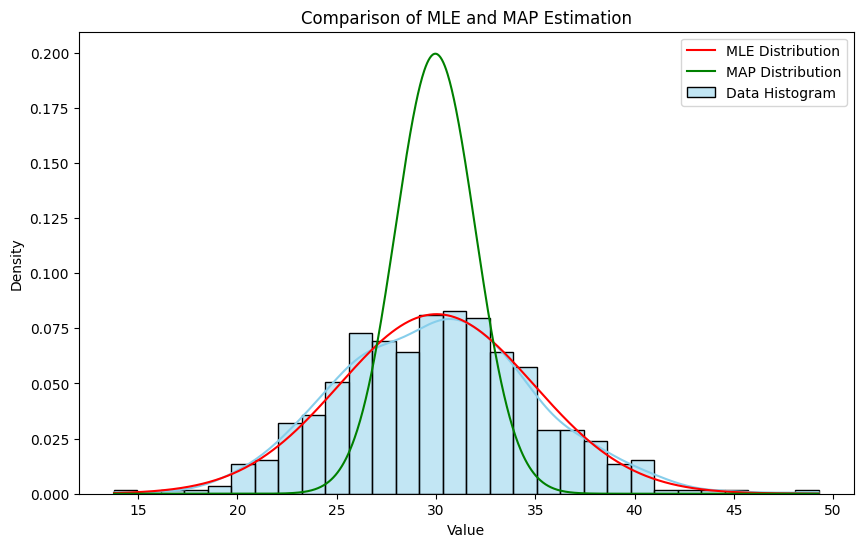

In [66]:
# 시각화
x = np.linspace(min(data), max(data), 1000)
sample_std = np.std(data)
mle_pdf = (1 / (np.sqrt(2 * np.pi) * sample_std)) * np.exp(-0.5 * ((x - mle_result) / sample_std)**2)
map_pdf = (1 / (np.sqrt(2 * np.pi) * sigma_prior)) * np.exp(-0.5 * ((x - map_result) / sigma_prior)**2)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color="skyblue", bins=30, label="Data Histogram", stat="density")
plt.plot(x, mle_pdf, label="MLE Distribution", color="red")
plt.plot(x, map_pdf, label="MAP Distribution", color="green")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Comparison of MLE and MAP Estimation")
plt.legend()
plt.show()

## 문제 3: 두 가지 추정 방법의 결과에 대해 MLE와 MAP를 비교하고, 차이가 발생했다면 그 이유를 서술하세요.  
(힌트: MLE와 MAP의 과정 차이)

MLE는 사전 확률을 고려하지 않고, 데이터만으로 모수를 추정하는 접근법이다. MAP는 데이터 외에도 사전 확률을 고려하여 모수를 추정하는 방법으로, 베이즈 정리를 직접적으로 사용하는 접근법이다.\
두 가지 추정 방법의 시각화를 보면, MLE는 데이터 자체만을 고려하여 확률분포를 추정하기 때문에, 데이터 분포의 중심이 30 근처에 형성되는 것을 확인할 수 있다. 반면, MAP는 사전 확률을 반영하는데, 사전 확률을 평균 25, 표준편차 2로 설정하였기 때문에, MLE에 비해 확률 분포가 25 방향(왼쪽)으로 살짝 치우쳐 있는 것을 확인할 수 있다. 또한, 사전 확률의 표준편차가 작아 분포가 좁아지기 때문에 MLE에 비해 데이터가 중심에 몰려 있는 것을 확인할 수 있다. (분산↓)\
데이터 샘플 수가 많아지면 데이터에 기반한 우도가 강해지면서 사전 확률의 영향이 줄어든다. 반대로 샘플 수가 적으면 우도 기반 추정이 불확실해지므로, 사전 확률의 영향이 커진다.\
본 과제에서는 데이터 샘플 수가 500으로 충분히 많기 때문에 사전 확률의 영향이 감소해서 차이가 미미해 보일 수 있으나, 샘플 수를 50, 30 정도로 낮추고 다시 시각화해보면 차이가 도드라지게 보인다.